Group A was offered a subscription at $4.99 without a discount note and Group B was offered the same subscription but with a 50% discount note.

Null hypothesis (H0):
"There is no difference in conversion rates between Group A and Group B."

### **Introduction to the A/B Test**

**Objective:** The A/B test aimed to evaluate the effectiveness of pricing strategies on user conversion rates.

**Groups:**

- **Group A**: Users offered a subscription at $4.99 without a discount note.
- **Group B**: Users offered the same subscription but with a 50% discount note.

In [1]:
# Importing needed libraries
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading data

In [2]:
ab_test_data = pd.read_csv('ab_test_data.csv')
# Parsing the timestamp for accurate date handling
ab_test_data['timestamp'] = pd.to_datetime(ab_test_data['timestamp'])

How many users in each test group?

In [3]:
users_count = ab_test_data['test_group'].value_counts()
print(f"Number of Users in Groups: A - {users_count['a']}, B - {users_count['b']}")

Number of Users in Groups: A - 10013, B - 9985


What is conversions numbers in each group?

In [4]:
conversions_count = ab_test_data.groupby('test_group')['conversion'].sum()
print(f"Number of Conversions in Groups: A - {conversions_count['a']}, B - {conversions_count['b']}")

Number of Conversions in Groups: A - 611, B - 889


Calculating conversion rates

In [5]:
conversion_rate = ab_test_data.groupby('test_group')['conversion'].mean()
print(f"Conversion Rates in Groups: A - {conversion_rate['a']}, B - {conversion_rate['b']}")

Conversion Rates in Groups: A - 0.06102067312493758, B - 0.08903355032548824


What was start and end dates of the test and what was duration?

In [6]:
start_date = ab_test_data['timestamp'].min()
end_date = ab_test_data['timestamp'].max()
test_duration = (end_date - start_date).days

print(f"Test Start Date: {start_date}, End Date: {end_date}, Duration (days): {test_duration}")

Test Start Date: 2023-07-03 01:42:34.033708, End Date: 2023-07-25 01:41:19.152664, Duration (days): 21


Performing Chi-Squared test to analyze A/B test data

In [7]:
# Creating a contingency table
contingency_table = [
    [conversions_count['a'], users_count['a'] - conversions_count['a']],
    [conversions_count['b'], users_count['b'] - conversions_count['b']]
]

# Performing the Chi-Squared Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Results
chi2_result = {'Chi-Squared Statistic': chi2, 'p-value': p_value}

chi2_result

{'Chi-Squared Statistic': 56.14249485320227, 'p-value': 6.740440730497395e-14}

The p-value is significantly less than the commonly accepted significance threshold (e.g., 0.05), which allows us to reject the null hypothesis. This means there is a statistically significant difference in the conversion rates between Group A and Group B. From this data, we can conclude that the offer with a 50% discount had a significant impact on increasing conversions.

Let's visually compare conversion rates with 95% confidence interval

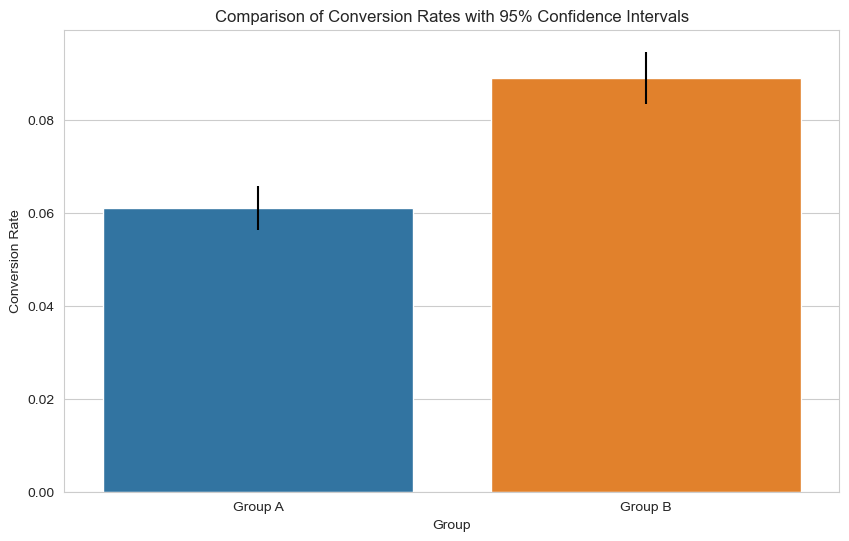

In [8]:
# Calculating mean and 95% confidence interval
# For Group A
mean_a = conversion_rate['a']
stderr_a = np.sqrt(mean_a * (1 - mean_a) / users_count['a'])
ci95_a = 1.96 * stderr_a

# For Group B
mean_b = conversion_rate['b']
stderr_b = np.sqrt(mean_b * (1 - mean_b) / users_count['b'])
ci95_b = 1.96 * stderr_b

# Data for visualization
groups = ['Group A', 'Group B']
means = [mean_a, mean_b]
ci95s = [ci95_a, ci95_b]

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=means, yerr=ci95s, capsize=.1)
plt.title('Comparison of Conversion Rates with 95% Confidence Intervals')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')

plt.show()

The visualization above compares the average conversion rates of Group A and Group B, along with their 95% confidence intervals.

Group A: This is the group offered the subscription at $4.99 without any discount note.
Group B: This group was offered the same subscription but with a note about a 50% discount.
The error bars represent the 95% confidence intervals, providing a range within which the true mean conversion rate is likely to fall for each group. This visualization clearly illustrates the difference in conversion rates between the two groups, with Group B showing a notably higher conversion rate

Let's see conversion rate in A and B groups over time

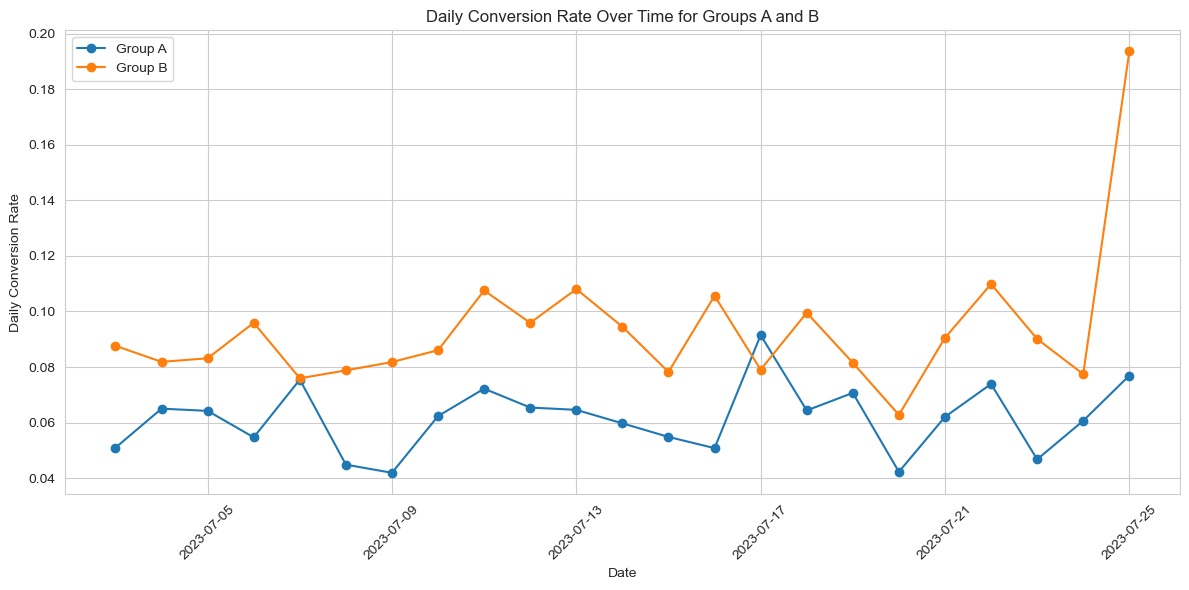

In [9]:
# Creating a column for date only (without time)
ab_test_data['date'] = ab_test_data['timestamp'].dt.date

# Grouping data by date and test group, then calculating conversion rate for each group per day
daily_conversion = ab_test_data.groupby(['date', 'test_group']).agg(
    daily_users=('user_id', 'count'),
    daily_conversions=('conversion', 'sum')
).reset_index()
daily_conversion['daily_conversion_rate'] = daily_conversion['daily_conversions'] / daily_conversion['daily_users']

# Separating data for Group A and Group B
daily_conversion_a = daily_conversion[daily_conversion['test_group'] == 'a']
daily_conversion_b = daily_conversion[daily_conversion['test_group'] == 'b']

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_conversion_a['date'], daily_conversion_a['daily_conversion_rate'], label='Group A', marker='o')
plt.plot(daily_conversion_b['date'], daily_conversion_b['daily_conversion_rate'], label='Group B', marker='o')
plt.title('Daily Conversion Rate Over Time for Groups A and B')
plt.xlabel('Date')
plt.ylabel('Daily Conversion Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

The graph above displays the daily conversion rate over time for both Group A and Group B.

Each point on the graph represents the daily conversion rate for the respective group. This visual representation allows us to see how the conversion rates fluctuated over the time of the test period.

### **Analysis and Results**

**User Participation:**

- **Group A**: 10,013 users
- **Group B**: 9,985 users

**Conversion Rates:**

- **Group A**: 6.10%
- **Group B**: 8.90%

**Statistical Test (Chi-Squared):**

- **Statistic**: 56.14
- **p-value**: ≈ 6.74e-14

**Interpretation:** The p-value significantly below 0.05 indicates a statistically significant difference in conversion rates between the two groups.

---

### **Visualization of the Results**

1. **Conversion Rates with Confidence Intervals:**
    - Bar chart showing higher conversion rates in Group B with 95% confidence intervals.
2. **Daily Conversion Rate Trends:**
    - Time-series plot showing the fluctuation in daily conversion rates across the test period for both groups.

---

### **Conclusions and Business Decision**

**Insights:**

- The 50% discount note in Group B led to a significantly higher conversion rate compared to Group A.
- Daily trends indicate consistent performance over time.

**Recommendations:**

- Implementing a discount strategy can effectively increase user conversions.
- Consider long-term impacts on revenue and customer perception.
- Further testing on different user segments and discount levels is advised.

---

### **Final Recommendation**

Based on the significant increase in conversion rates observed in Group B, it is recommended to adopt the discount strategy in a broader context, with continual monitoring and analysis of its long-term effects on user engagement and revenue.